<img src="Sklearn1.png" width=400 height=400 align="center">

https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/

##                                               Scikit Learn History & Background

"If you are a python programmer, looking to perform machine learning, scikit learn is simply the way to go.

"A wise man once describe Scikit Learn as "the Swiss Knife of Machine Learning in Python" - Prof. Manoel Gadi"

This project was started in 2007 as a Google Summer of Code project by David Cournapeau. Later that year, Matthieu Brucher started work on this project as part of his thesis.

In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort and Vincent Michel of INRIA took leadership of the project and made the first public release, February the 1st 2010. 

### What is scikit-learn?

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

The library was initially built upon the SciPy (Scientific Python). Which is a prerequisite that must be installed before you can use scikit-learn.

-NumPy: Base n-dimensional array package

-SciPy: Fundamental library for scientific computing

-Matplotlib: Comprehensive 2D/3D plotting

-IPython: Enhanced interactive console

-Sympy: Symbolic mathematics

-Pandas: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

Scikit Learn is focused on Machine Learning, e.g data modelling. It is not concerned with the loading, handling, manipulating, and visualising of data. 

Scikit’s robust set of algorithm offerings includes:

-Regression: Fitting linear and non-linear models

-Clustering: Unsupervised classification

-Decision Trees: Tree induction and pruning for both classification and regression tasks

-Neural Networks: End-to-end training for both classification and regression. Layers can be easily defined in a tuple

-SVMs: for learning decision boundaries

-Naive Bayes: Direct probabilistic modelling

Even beyond that, it has some very convenient and advanced functions not commonly offered by other libraries:

-Ensemble Methods: Boosting, Bagging, Random Forest, Model voting and averaging

-Feature Manipulation: Dimensionality reduction, feature selection, feature analysis

-Outlier Detection: For detecting outliers and rejecting noise

-Model selection and validation: Cross-validation, Hyperparamter tuning, and metrics


Currently on version Version 0.21.2

### Funding

INRIA actively supports this project. It has provided funding for Fabian Pedregosa (2010-2012), Jaques Grobler (2012-2013) and Olivier Grisel (2013-2017) to work on this project full-time. It also hosts coding sprints and other events.

Paris-Saclay Center for Data Science funded one year for a developer to work on the project full-time (2014-2015) and 50% of the time of Guillaume Lemaitre (2016-2017).

NYU Moore-Sloan Data Science Environment funded Andreas Mueller (2014-2016) to work on this project. The Moore-Sloan Data Science Environment also funds several students to work on the project part-time.

Télécom Paristech funded Manoj Kumar (2014), Tom Dupré la Tour (2015), Raghav RV (2015-2017), Thierry Guillemot (2016-2017) and Albert Thomas (2017) to work on scikit-learn.

Columbia University funds Andreas Müller since 2016.

Andreas Müller also received a grant to improve scikit-learn from the Alfred P. Sloan Foundation in 2017.

The University of Sydney funds Joel Nothman since July 2017.

The Labex DigiCosme funded Nicolas Goix (2015-2016), Tom Dupré la Tour (2015-2016 and 2017-2018), Mathurin Massias (2018-2019) to work part time on scikit-learn during their PhDs. It also funded a scikit-learn coding sprint in 2015.


<img src="Lending_Club_logo.png" width=400 height=400 align="center">

LendingClub is a US peer-to-peer lending company on bringing borrowers and investors together, transforming the way people access credit. Since 2017, the lending Club has helped millions of people take control of their debt, grow their small businesses, and invest for the future.

# Exploratory Data Analysis

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Import necessary libraries

In [6]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, OneHotEncoder

In [7]:
pd.set_option('display.max_columns',60)

## Load Dataset

In [8]:
start_df = pd.read_csv('./loan.csv', low_memory=False)
df_description = pd.read_excel('./LCDataDictionary.xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '800px'})

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


Work with a copy of dataset to avoid having to reload:

In [9]:
df = start_df.copy(deep=True)
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d'].dt.month
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,month
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,...,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,...,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,...,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,...,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,...,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 76 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
loan_status  

In [11]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,month
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000,887379.000000,887379.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307,2014.021761,7.023412
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067,1.261741,3.385852
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,2007.000000,1.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000,2013.000000,4.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000

In [12]:
df_missing = df.isna()
df_missing = (df_missing.sum()/len(df))*100
df_missing = df_missing[df_missing!=0]
print(df_missing.sort_values(ascending = False))

dti_joint                      99.942640
annual_inc_joint               99.942415
verification_status_joint      99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
total_cu_tl                    97.591559
open_acc_6m                    97.591559
open_il_6m                     97.591559
open_il_12m                    97.591559
open_il_24m                    97.591559
inq_last_12m                   97.591559
total_bal_il                   97.591559
open_rv_12m                    97.591559
open_rv_24m                    97.591559
max_bal_bc                     97.591559
all_util                       97.591559
inq_fi                         97.591559
desc                           85.797726
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
next_pymnt_d                   28.507661
tot_cur_bal                     7.919502
tot_coll_amt                    7.919502
total_rev_hi_lim

In [13]:
for i in df.columns:
    inspect = df[i].value_counts()/len(df)
    print(inspect.head(10))

4196351     0.000001
40715249    0.000001
6915747     0.000001
11915002    0.000001
22211335    0.000001
7535365     0.000001
28492546    0.000001
64150273    0.000001
39660287    0.000001
8205052     0.000001
Name: id, dtype: float64
58732538    0.000001
353782      0.000001
56268296    0.000001
59631955    0.000001
73070084    0.000001
45147868    0.000001
72139757    0.000001
66772481    0.000001
49993216    0.000001
31796735    0.000001
Name: member_id, dtype: float64
10000.0    0.069685
12000.0    0.056552
15000.0    0.053202
20000.0    0.052888
35000.0    0.040984
8000.0     0.031407
5000.0     0.030615
6000.0     0.029533
25000.0    0.027187
16000.0    0.026717
Name: loan_amnt, dtype: float64
10000.0    0.069580
12000.0    0.056447
15000.0    0.053071
20000.0    0.052676
35000.0    0.040828
8000.0     0.031392
5000.0     0.030599
6000.0     0.029517
25000.0    0.026875
16000.0    0.026619
Name: funded_amnt, dtype: float64
10000.0    0.063232
12000.0    0.050597
15000.0    0.0468

f    0.514829
w    0.485171
Name: initial_list_status, dtype: float64
0.0        0.288262
10000.0    0.001328
15000.0    0.001106
12000.0    0.001069
20000.0    0.001055
35000.0    0.000979
5000.0     0.000752
24000.0    0.000641
8000.0     0.000624
6000.0     0.000614
Name: out_prncp, dtype: float64
0.0        0.288262
10000.0    0.001304
15000.0    0.001067
12000.0    0.001030
20000.0    0.000988
35000.0    0.000814
5000.0     0.000747
8000.0     0.000616
6000.0     0.000609
24000.0    0.000596
Name: out_prncp_inv, dtype: float64
0.00       0.020013
648.57     0.000152
938.06     0.000151
623.86     0.000148
6743.73    0.000132
1566.46    0.000132
1264.97    0.000128
627.39     0.000128
313.70     0.000125
1879.75    0.000118
Name: total_pymnt, dtype: float64
0.00       0.020326
648.57     0.000148
938.06     0.000145
623.86     0.000134
1566.46    0.000128
6743.73    0.000127
1264.97    0.000124
313.70     0.000122
627.39     0.000122
616.95     0.000117
Name: total_pymnt_inv, dtype

## Exploratory Data Vizualisation 

## Define target variable

Based on problem defined for dataset, we are building a model that will predict whether a user will defaul in future.

Therefore, we need to convert the historical loan status categories into a boolean that describes wheter or not the customer defaulted. 

In [15]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

Defines which 'loan status' is considered as 'Defaulted':

In [16]:
target_list = [1 if i in ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default','Late (31-120 days)','Late (16-30 days)'] else 0 for i in df['loan_status']]

Calculate how much of dataset 'Defaults' based on this description:

In [17]:
print(sum(target_list), sum(target_list)/len(target_list))

61176 0.06894010338310913


In [18]:
df['TARGET'] = target_list

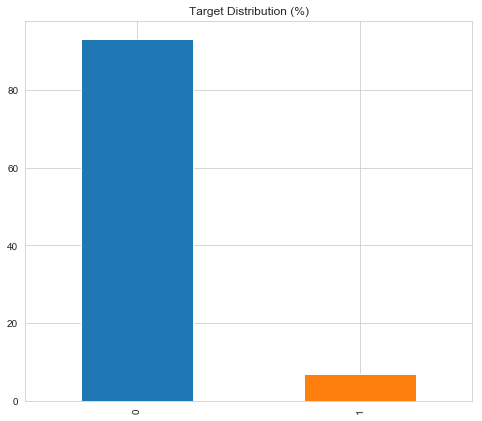

In [19]:
plt.figure(figsize=(8, 7))
target_count = (df["TARGET"].value_counts() / len(df)) * 100
target_count.plot(kind="bar", title="Target Distribution (%)")

Text(0, 0.5, 'Average loan amount issued')

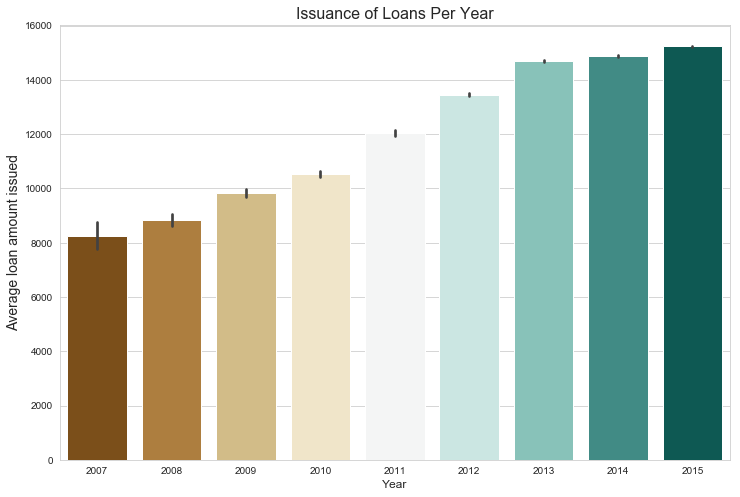

In [14]:
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df, palette="BrBG")
plt.title('Issuance of Loans Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average loan amount issued', fontsize=14)

Text(0.5, 1.0, 'Default rate per year')

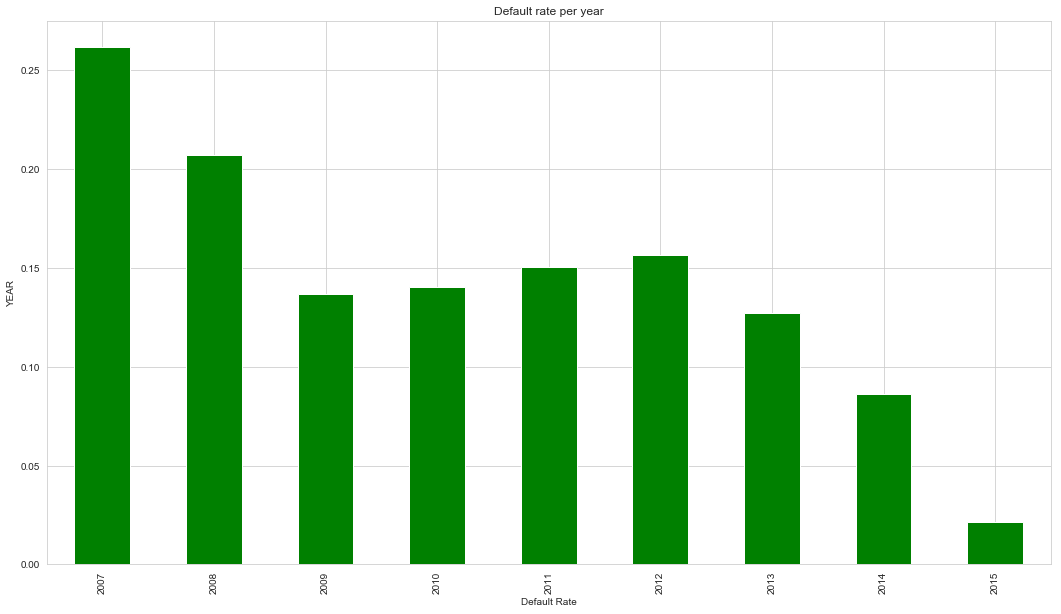

In [23]:
YEAR = pd.DataFrame()
YEAR['YEAR_1'] = df[df['TARGET']==1].groupby('year')['TARGET'].count()
YEAR['YEAR_2'] = df[df['TARGET']==0].groupby('year')['TARGET'].count()
YEAR['ratio'] = YEAR['YEAR_1']/(YEAR['YEAR_1']+YEAR['YEAR_2'])

fig = plt.figure(figsize=(18,10))
YEAR['ratio'].plot(kind='bar', color='green')
plt.ylabel('YEAR')
plt.xlabel('Default Rate')
plt.title('Default rate per year')



Text(0.5, 1.0, 'Default rate per State')

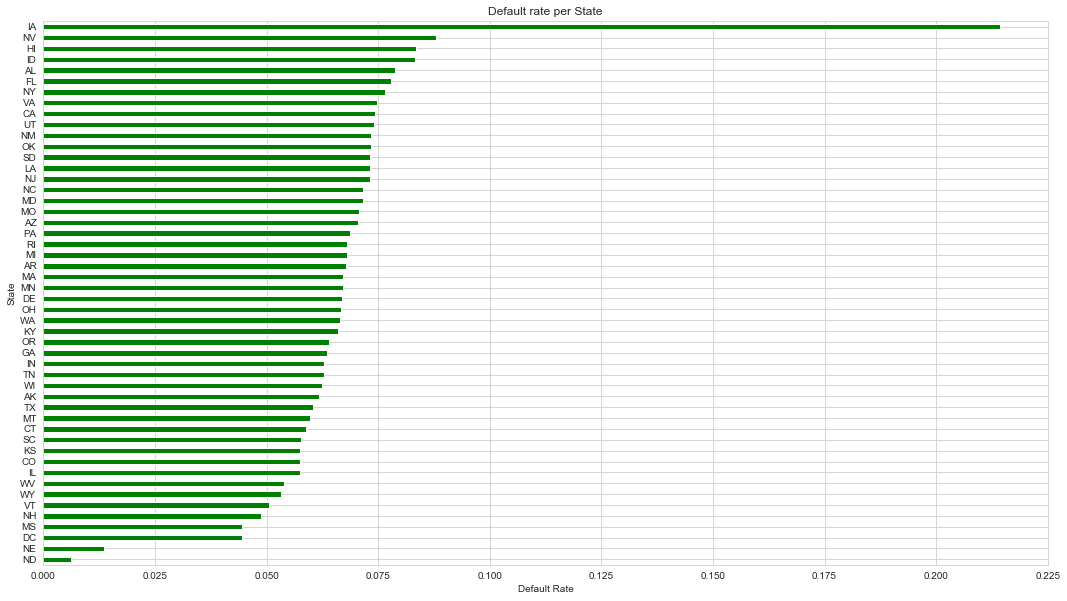

In [22]:
STATE = pd.DataFrame()
STATE['State_1'] = df[df['TARGET']==1].groupby('addr_state')['TARGET'].count()
STATE['State_2'] = df[df['TARGET']==0].groupby('addr_state')['TARGET'].count()
STATE['ratio'] = STATE['State_1']/(STATE['State_1']+STATE['State_2'])

fig = plt.figure(figsize=(18,10))
STATE['ratio'].sort_values().plot(kind='barh', color='green')
plt.ylabel('State')
plt.xlabel('Default Rate')
plt.title('Default rate per State')

Text(0.5, 1.0, 'Interest rate by grade')

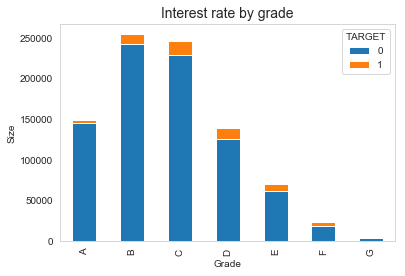

In [20]:
loans_by_region = df.groupby(['grade', 'TARGET']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, grid=False)
#ax1.set_title('Type of Loans by Grade', fontsize=14)
plt.ylabel('Size')
plt.xlabel('Grade')
plt.title('Interest rate by grade', fontsize=14)

Text(0.5, 1.0, 'Interest rate by grade')

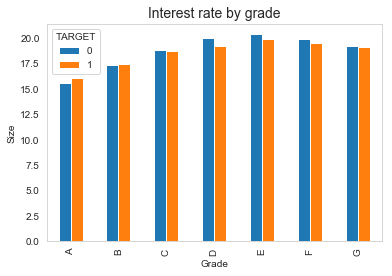

In [21]:
loans_by_region = df.groupby(['grade', 'TARGET']).dti.mean()
loans_by_region.unstack().plot(kind='bar', stacked=False, grid=False)
#ax1.set_title('Type of Loans by Grade', fontsize=14)
plt.ylabel('Size')
plt.xlabel('Grade')
plt.title('Interest rate by grade', fontsize=14)

Text(0.5, 1.0, 'Default count by length of employment')

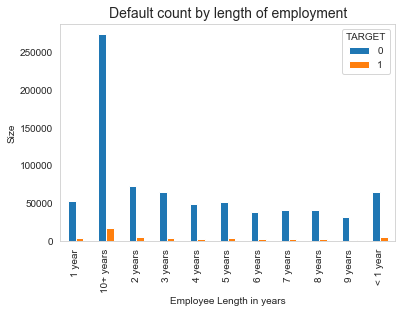

In [33]:
loans_by_emp_length = df.groupby(['emp_length', 'TARGET']).size()
loans_by_emp_length.unstack().plot(kind='bar', stacked=False, grid=False)
#ax1.set_title('Type of Loans by Grade', fontsize=14)
plt.ylabel('Size')
plt.xlabel('Employee Length in years')
plt.title('Default count by length of employment', fontsize=14)

Text(0.5, 1.0, 'Loan amount by grade')

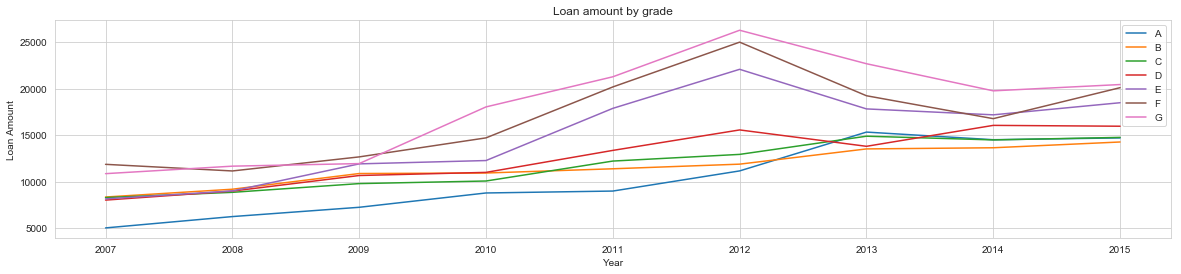

In [24]:
by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, figsize=(20, 4)).legend()
plt.ylabel('Loan Amount')
plt.xlabel('Year')
plt.title('Loan amount by grade')

Text(0.5, 1.0, 'Interest rate by grade')

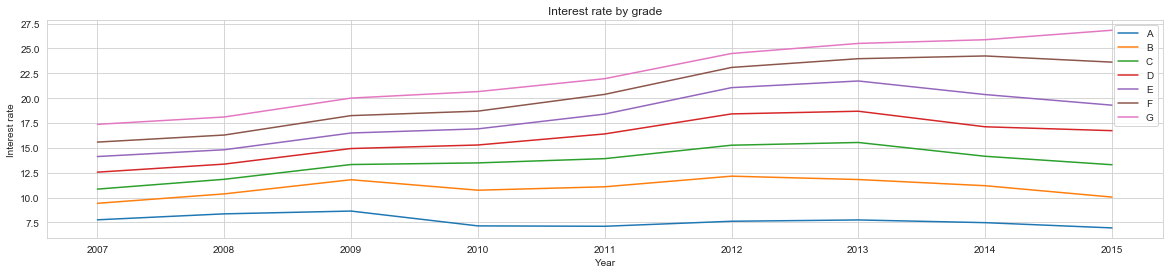

In [25]:
by_credit_score = df.groupby(['year', 'grade']).int_rate.mean()
by_credit_score.unstack().plot(legend=False, figsize=(20, 4)).legend()
plt.ylabel('Interest rate')
plt.xlabel('Year')
plt.title('Interest rate by grade')


Text(0.5, 1.0, 'Distribution of Loan Amount by Purpose')

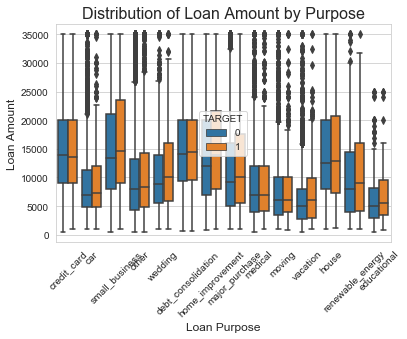

In [39]:
# Create a dataframe for default loans
#default_df = df.loc[df['TARGET'] == 1]

g = sns.boxplot(x='purpose', y='loan_amnt', hue='TARGET', data=df)

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Purpose", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Loan Amount by Purpose", fontsize=16)